Importando as Bibliotecas

In [1]:
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Importando o Léxico

In [2]:
sentilexpt = open('SentiLex-lem-PT01.txt','r', encoding = 'utf-8')

Iterar sobre o Léxico

In [3]:
dic_palavra_polaridade = {}
for i in sentilexpt.readlines():
    pos_ponto = i.find('.')
    palavra = (i[:pos_ponto])
    pol_pos = i.find('POL')
    polaridade = (i[pol_pos+4:pol_pos+6]).replace(';',' ')
    dic_palavra_polaridade[palavra] = polaridade

Atribuindo valores a cada palavra de acordo com o Sentilex na frase de entrada e retornar o valor final da frase completa atraves do operador somatorio (sum)

In [4]:
def Score_sentimento(frase):
    frase = frase.lower()
    l_sentimento = []
    for p in frase.split():
        l_sentimento.append(int(dic_palavra_polaridade.get(p, 0)))
    score = sum(l_sentimento)
    return '{}'.format(score)
    

Lendo o arquivo banco de dados. A coluna "Polaridade" foi o rotulo de sentimento atribuido pelo aluno. A coluna "Nvpolaridade" foi atribuida por nos com a finalidade de aproximar ainda mais o rotulo com o sentimento da frase.

In [5]:
dados = pd.read_csv("Banco de dados.csv", delimiter=";")

Aplicando a função Score_sentimento e colocando no Dataframe uma coluna "Sentimento" com o valor da frase inteira

In [6]:
sentimento = [Score_sentimento(dados["Frase"][ind]) for ind in dados.index]

In [7]:
dados["Sentimento"] = sentimento

In [8]:
banco = dados

In [9]:
banco

,Frase,Polaridade,Nvpolaridade,Sentimento
0,Poderia ter sido melhor devido ao pouco tempo ...,Positivo,Neutro,0
1,Me sai bem na avaliação pois ele desenvolveu o...,Positivo,Positivo,-2
2,Foi um desenvolvimento mediano poderia ter um ...,Neutro,Neutro,-1
3,Poderia ser melhor pois não me doei o suficien...,Neutro,Negativo,1
4,Tive um desempenho razoavel na avaliação,Positivo,Neutro,0
5,O professor não mostrou uma completa dominio n...,Positivo,Negativo,2
6,De acordo com o professor eu fui bem,Positivo,Positivo,0
7,Me sinto frustrado com algumas materias por nã...,Neutro,Negativo,-1
8,Ocorreu de maneira satisfatoria,Positivo,Positivo,0
9,Aula bastante prudutiva pois foi abordado dive...,Positivo,Neutro,0


Classificando as frases de acordo com os seus valores para comparação com os rotulos

In [10]:
def polaridade_numero(pol):
    if int(pol) <= -1:
        return -1
    elif int(pol) == 0:
        return 0
    else: 
        return 1

Atribuindo valores numericos ao rotulos para comparar com os valores das frases

In [11]:
def polaridade_texto(pol):
    if pol == 'Positivo':
        return 1
    elif pol == 'Neutro':
        return 0
    else:
        return -1

Comparação entre os rotulos e os valores das frases

In [12]:
def acuracia(anls, pred):
    if (anls - pred) == 0:
        return 'certo'
    else:
        return 'errado'

Organizando no Dataframe as colunas com os seus respectivos valores

In [13]:
polaridade = [polaridade_texto(banco['Nvpolaridade'][ind]) for ind in banco.index]

In [14]:
banco['Nvpolaridade'] = polaridade

In [15]:
polaridade_num = [polaridade_numero(banco['Sentimento'][ind]) for ind in banco.index]

In [16]:
banco['Sentimento'] = polaridade_num

In [17]:
acuracia = [acuracia(banco['Nvpolaridade'][ind], banco['Sentimento'][ind]) for ind in banco.index]

In [18]:
acuracia = pd.DataFrame(acuracia)

In [19]:
banco['Acuracia'] = acuracia

Analisando o banco

In [20]:
banco

,Frase,Polaridade,Nvpolaridade,Sentimento,Acuracia
0,Poderia ter sido melhor devido ao pouco tempo ...,Positivo,0,0,certo
1,Me sai bem na avaliação pois ele desenvolveu o...,Positivo,1,-1,errado
2,Foi um desenvolvimento mediano poderia ter um ...,Neutro,0,-1,errado
3,Poderia ser melhor pois não me doei o suficien...,Neutro,-1,1,errado
4,Tive um desempenho razoavel na avaliação,Positivo,0,0,certo
5,O professor não mostrou uma completa dominio n...,Positivo,-1,1,errado
6,De acordo com o professor eu fui bem,Positivo,1,0,errado
7,Me sinto frustrado com algumas materias por nã...,Neutro,-1,-1,certo
8,Ocorreu de maneira satisfatoria,Positivo,1,0,errado
9,Aula bastante prudutiva pois foi abordado dive...,Positivo,0,0,certo


Indice de acertos

In [21]:
acuracia[0].value_counts()

errado    27
certo     18
Name: 0, dtype: int64

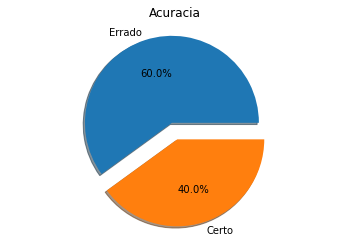

In [22]:
x = acuracia[0].value_counts()
labels_list = ['Errado', 'Certo']
plt.axis('equal')
ex=(0.1,0.1)
plt.pie(x, labels=labels_list, autopct='%1.1f%%', explode=ex, shadow=True)
plt.title('Acuracia')
plt.show()

_______________________________________________________________________________________________________________________________

Frases com divergencia entre o seu rotulo e o valor

In [23]:
banco.loc[banco['Acuracia'] == 'errado']

,Frase,Polaridade,Nvpolaridade,Sentimento,Acuracia
1,Me sai bem na avaliação pois ele desenvolveu o...,Positivo,1,-1,errado
2,Foi um desenvolvimento mediano poderia ter um ...,Neutro,0,-1,errado
3,Poderia ser melhor pois não me doei o suficien...,Neutro,-1,1,errado
5,O professor não mostrou uma completa dominio n...,Positivo,-1,1,errado
6,De acordo com o professor eu fui bem,Positivo,1,0,errado
8,Ocorreu de maneira satisfatoria,Positivo,1,0,errado
12,Hoje eu não prestei muita atençao no conteudo ...,Neutro,-1,0,errado
13,Desempenho mediano apresentado dificuldades sa...,Negativo,-1,0,errado
14,Gostei do meu desempenho essa é uma materia qu...,Positivo,1,-1,errado
15,Eu acredito que fui bem na avaliação pois me p...,Positivo,1,0,errado


Função para retornar os valores das frases individualmente para analise

In [24]:
def Score_sentimentotest(frase):
    frase = frase.lower()
    l_sentimento = dict()
    for p in frase.split():
        l_sentimento[p] = int(dic_palavra_polaridade.get(p, 0))
    for i in l_sentimento.items():
        return l_sentimento

In [25]:
score = [Score_sentimentotest(dados["Frase"][ind]) for ind in dados.index]

In [26]:
dados["Valores das palavras"] = score

Analisando

In [27]:
dados

,Frase,Polaridade,Nvpolaridade,Sentimento,Acuracia,Valores das palavras
0,Poderia ter sido melhor devido ao pouco tempo ...,Positivo,0,0,certo,"{'poderia': 0, 'ter': 0, 'sido': 0, 'melhor': ..."
1,Me sai bem na avaliação pois ele desenvolveu o...,Positivo,1,-1,errado,"{'me': 0, 'sai': 0, 'bem': 0, 'na': 0, 'avalia..."
2,Foi um desenvolvimento mediano poderia ter um ...,Neutro,0,-1,errado,"{'foi': 0, 'um': 0, 'desenvolvimento': 0, 'med..."
3,Poderia ser melhor pois não me doei o suficien...,Neutro,-1,1,errado,"{'poderia': 0, 'ser': 0, 'melhor': 0, 'pois': ..."
4,Tive um desempenho razoavel na avaliação,Positivo,0,0,certo,"{'tive': 0, 'um': 0, 'desempenho': 0, 'razoave..."
5,O professor não mostrou uma completa dominio n...,Positivo,-1,1,errado,"{'o': 0, 'professor': 0, 'não': 0, 'mostrou': ..."
6,De acordo com o professor eu fui bem,Positivo,1,0,errado,"{'de': 0, 'acordo': 0, 'com': 0, 'o': 0, 'prof..."
7,Me sinto frustrado com algumas materias por nã...,Neutro,-1,-1,certo,"{'me': 0, 'sinto': 0, 'frustrado': -1, 'com': ..."
8,Ocorreu de maneira satisfatoria,Positivo,1,0,errado,"{'ocorreu': 0, 'de': 0, 'maneira': 0, 'satisfa..."
9,Aula bastante prudutiva pois foi abordado dive...,Positivo,0,0,certo,"{'aula': 0, 'bastante': 0, 'prudutiva': 0, 'po..."
